### Import Modules

In [ ]:
from nltk.tokenize import word_tokenize


import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
import numpy as array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.embeddings import Embedding
from keras.layers import Flatten
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPool1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer


### Import Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset= pd.read_csv('/content/drive/MyDrive/4-1_Semester/practice code/Sentiment Analysis/Twiter Dataset/twitter1.6m.csv')
dataset.head()

,tweet,label
0,is upset that he can't update his Facebook by ...,0
1,@Kenichan I dived many times for the ball. Man...,0
2,my whole body feels itchy and like its on fire,0
3,"@nationwideclass no, it's not behaving at all....",0
4,@Kwesidei not the whole crew,0


In [ ]:
# dataset.sentiment = dataset.sentiment.apply(lambda x: 0 if x =='negative' else 1)
dataset.head()

,tweet,label
0,is upset that he can't update his Facebook by ...,0
1,@Kenichan I dived many times for the ball. Man...,0
2,my whole body feels itchy and like its on fire,0
3,"@nationwideclass no, it's not behaving at all....",0
4,@Kwesidei not the whole crew,0


In [ ]:
dataset.shape
dataset.label.value_counts()

1    800000
0    799999
Name: label, dtype: int64

### Processing Data

In [ ]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
  return TAG_RE.sub('',text)

def preprocesses_text(sen):

  sentence = remove_tags(sen)
  sentence = re.sub(r'[^\w\s]','',sen, re.UNICODE)

  sentence = re.sub('^a-zA-Z', ' ', sentence)

  sentence = re.sub(r"\s+[a-zA-Z]\s", ' ', sentence)

  sentence = re. sub(r'\s+', ' ',sentence)

  return sentence



In [ ]:
X = []
sentences = list(dataset['tweet'])
for s in sentences:
  X.append(preprocesses_text(s))

In [ ]:
X[0]

'is upset that he cant update his Facebook by texting it and might cry as result School today also Blah'

### Train - Test Split

In [ ]:
y = dataset['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state= 42)

In [ ]:
tokenizer = Tokenizer(num_words=250, lower= False)
tokenizer.fit_on_texts(X_train)


In [ ]:
vocab_size = len(tokenizer.word_index) + 1
maxlen =200

In [ ]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
X_train = pad_sequences(X_train, maxlen=maxlen, truncating='post', padding='post')
X_test = pad_sequences(X_test, maxlen=maxlen, truncating='post', padding='post')

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1279999, 200) (1279999,)
(320000, 200) (320000,)


### Model Fit - CNN

In [ ]:
from keras.layers import Input
model_CNN = Sequential()
model_CNN. add (Embedding(input_dim = vocab_size, output_dim = 50, input_length = maxlen, trainable=False))
model_CNN. add (Conv1D(filters=128, kernel_size= 5,padding ='same', activation= 'relu'))
model_CNN. add (Dense(24, activation= 'relu'))
model_CNN. add (GlobalMaxPool1D())
model_CNN. add (Dropout(0.3))
model_CNN. add (Dense(1, activation= 'sigmoid'))


# model_CNN. add (Conv1D(filters=32, kernel_size=3, padding = 'same',activation = 'relu'))
# model_CNN. add (MaxPooling1D(pool_size = 2))
# model_CNN. add (Conv1D(filters=32, kernel_size=3, padding = 'same',activation = 'relu'))
# model_CNN. add (Dense(1, activation= 'sigmoid'))

model_CNN.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [ ]:
model_CNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 50)           40631050  
                                                                 
 conv1d (Conv1D)             (None, 200, 128)          32128     
                                                                 
 dense (Dense)               (None, 200, 24)           3096      
                                                                 
 global_max_pooling1d (Globa  (None, 24)               0         
 lMaxPooling1D)                                                  
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                        

In [ ]:
history = model_CNN.fit(X_train, y_train, epochs=10, batch_size=4, verbose=1, validation_split= 0.2)
score =model_CNN.evaluate(X_test, y_test, verbose=1)

Epoch 1/10
256000/256000 [==============================] - 1142s 4ms/step - loss: 0.5838 - accuracy: 0.6869 - val_loss: 0.5584 - val_accuracy: 0.7074
Epoch 2/10
256000/256000 [==============================] - 1117s 4ms/step - loss: 0.5637 - accuracy: 0.7050 - val_loss: 0.5528 - val_accuracy: 0.7121
Epoch 3/10
256000/256000 [==============================] - 1109s 4ms/step - loss: 0.5571 - accuracy: 0.7109 - val_loss: 0.5533 - val_accuracy: 0.7124
Epoch 4/10
256000/256000 [==============================] - 1105s 4ms/step - loss: 0.5533 - accuracy: 0.7140 - val_loss: 0.5508 - val_accuracy: 0.7125
Epoch 5/10
256000/256000 [==============================] - 1102s 4ms/step - loss: 0.5505 - accuracy: 0.7165 - val_loss: 0.5505 - val_accuracy: 0.7123
Epoch 6/10
256000/256000 [==============================] - 1102s 4ms/step - loss: 0.5483 - accuracy: 0.7179 - val_loss: 0.5506 - val_accuracy: 0.7150
Epoch 7/10
256000/256000 [==============================] - 1063s 4ms/step - loss: 0.5459 - ac

### Data Validation

In [ ]:
print("Test Score: ",score[0])
print("Test Accuracy: ", score[1])

Test Score:  0.550208330154419
Test Accuracy:  0.7149937748908997


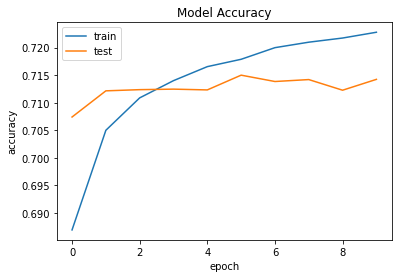

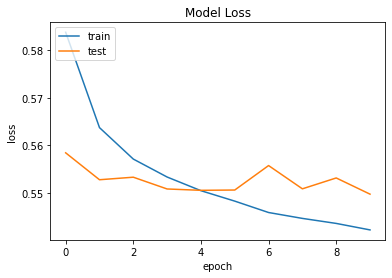

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')

plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title("Model Loss")
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train', 'test'], loc = 'upper left')

plt.show()

### Other Scores

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)

[[  7694 151800]
 [  5200 155306]]


0.509375

In [ ]:
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_fscore_support

def evaluate(y_test, y_pred):
    """
    - Print AUC and accuracy on the test set
    - Plot ROC
    @params    probs (np.array): an array of predicted probabilities with shape (len(y_true), 2)
    @params    y_true (np.array): an array of the true values with shape (len(y_true),)
    """

    print(cm)
    precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average = 'binary')
    print(f"precision:{precision:.3f} \nrecall:{recall:.3f}\nF1 score: {f1:.3f}")

    # preds = probs[:, 1]
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    print(f'AUC: {roc_auc:.4f}')

    
    # Get accuracy over the test set
    # y_pred = np.where(preds >= 0.5, 1, 0)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy*100:.2f}%')
    
    # Plot ROC AUC
    plt.title('CNN')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

[[  7694 151800]
 [  5200 155306]]
precision:0.506 
recall:0.968
F1 score: 0.664
AUC: 0.5079
Accuracy: 50.94%


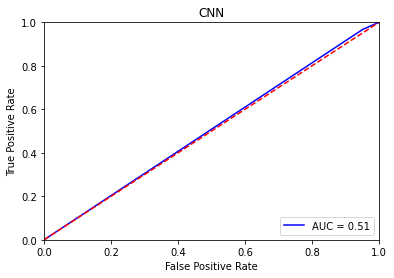

In [ ]:
evaluate(y_test, y_pred)